In [1]:
%pylab inline

/Users/jcolucci/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import string
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [3]:
#Read in Apogee data, check size
df=pd.read_csv('MyTable_1_morley.csv')
len(df.index)

10000

In [4]:
#Is everything loaded correctly? what do the data look like?
df[:10]


,apogee_id,target_id,ra,dec,glon,glat,vhelio_avg,vscatter,teff,logg,...,DDO51,wash_ddo51_giant_flag,wash_ddo51_star_flag,irac_3_6,irac_4_5,irac_5_8,irac_8_0,sfd_ebv,Column1,Column2
0,2M00475480+2055312,1.calibration.2M00475480+2055312,11.978455,20.925344,121.825575,-41.938749,0.834127,0.0,6229.0,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.032552,null,null
1,2M01081597+5455148,1.calibration.2M01081597+5455148,17.068312,54.920341,125.372343,-7.871484,-96.144800,0.0,5134.2,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.418305,null,null
2,2M01094391+3537137,1.calibration.2M01094391+3537137,17.433016,35.620556,127.107561,-27.102719,-0.005711,0.0,3859.2,1.154406,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.058886,null,null
3,2M01101875+4204533,1.calibration.2M01101875+4204533,17.578087,42.081474,126.672978,-20.653017,-13.564500,0.0,5773.7,3.577268,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.077669,null,null
4,2M01484160+3241239,1.calibration.2M01484160+3241239,27.173180,32.690208,136.647587,-28.651969,-23.623400,0.0,5751.9,3.876734,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.044743,null,null
5,2M02264972+4457464,1.calibration.2M02264972+4457464,36.707241,44.962921,140.134614,-14.698783,-147.728000,0.0,6410.3,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.092392,ALPHAFE_WARN,SUSPECT_BROAD_LINES
6,2M02360498+0653140,1.calibration.2M02360498+0653140,39.020393,6.886874,163.401989,-47.593278,25.717900,0.0,4727.5,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.115141,VMICRO_WARN,null
7,2M03183846+7216305,1.calibration.2M03183846+7216305,49.660412,72.275124,133.700518,12.555295,27.953900,0.0,5143.2,3.387044,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.649127,VMICRO_WARN,null
8,2M03385721+4232178,1.calibration.2M03385721+4232178,54.738270,42.538277,152.934455,-10.368127,-40.017400,0.0,5702.7,3.842756,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.273106,VMICRO_WARN,null
9,2M03470204+4125397,1.calibration.2M03470204+4125397,56.758804,41.427238,154.832793,-10.318776,52.751200,0.0,4735.2,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.361122,null,null


In [5]:
#check out contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
apogee_id                10000 non-null object
target_id                10000 non-null object
ra                       10000 non-null float64
dec                      10000 non-null float64
glon                     10000 non-null float64
glat                     10000 non-null float64
vhelio_avg               10000 non-null float64
vscatter                 10000 non-null float64
teff                     10000 non-null float64
logg                     10000 non-null float64
m_h                      10000 non-null float64
m_h_err                  10000 non-null float64
alpha_m                  10000 non-null float64
c_fe                     10000 non-null float64
c_fe_err                 10000 non-null float64
n_fe                     10000 non-null float64
n_fe_err                 10000 non-null float64
o_fe                     10000 non-null float64
o_fe_err                 10000

In [6]:
#The last two columns include warning flags, check out what they are 
df[df.Column1 != 'null'].Column1.unique()

array(['ALPHAFE_WARN ', 'VMICRO_WARN ', 'STAR_WARN TEFF_WARN ',
       'NFE_WARN ', 'SN_WARN STAR_WARN ',
       'STAR_WARN VMICRO_WARN TEFF_WARN ', 'NFE_WARN METALS_WARN ',
       'NFE_WARN CFE_WARN ', 'ROTATION_WARN STAR_WARN ', 'CFE_WARN ',
       'STAR_WARN VMICRO_WARN LOGG_WARN ', 'STAR_WARN LOGG_WARN ',
       'SN_WARN STAR_WARN VMICRO_WARN ', ' SN_WARN STAR_WARN VMICRO_WARN ',
       ' COLORTE_WARN STAR_WARN VMICRO_WARN ',
       'COLORTE_WARN STAR_WARN VMICRO_WARN ', ' VMICRO_WARN ',
       'COLORTE_WARN STAR_WARN NFE_WARN ',
       'SN_WARN COLORTE_WARN STAR_WARN ', 'SN_WARN STAR_WARN NFE_WARN ',
       'COLORTE_WARN STAR_WARN ', ' ', 'SN_WARN CHI2_WARN STAR_WARN ',
       'SN_WARN COLORTE_WARN STAR_WARN VMICRO_WARN ',
       'SN_WARN STAR_WARN CFE_WARN ', 'COLORTE_WARN STAR_WARN TEFF_WARN ',
       ' SN_WARN STAR_WARN ', ' COLORTE_WARN STAR_WARN ',
       'COLORTE_WARN STAR_WARN CFE_WARN ',
       'COLORTE_WARN STAR_WARN METALS_WARN ',
       'COLORTE_WARN STAR_WARN NFE_WARN 

In [7]:
df[df.Column2 != 'null'].Column2.unique()


array(['SUSPECT_BROAD_LINES ', 'SUSPECT_RV_COMBINATION ',
       'SUSPECT_BROAD_LINES SUSPECT_RV_COMBINATION ', 'PERSIST_HIGH ',
       'BRIGHT_NEIGHBOR ', 'PERSIST_HIGH BRIGHT_NEIGHBOR ',
       'PERSIST_LOW BRIGHT_NEIGHBOR ',
       'SUSPECT_BROAD_LINES SUSPECT_RV_COMBINATION BRIGHT_NEIGHBOR ',
       'PERSIST_LOW PERSIST_HIGH ', 'PERSIST_LOW ',
       'SUSPECT_BROAD_LINES SUSPECT_RV_COMBINATION PERSIST_HIGH BRIGHT_NEIGHBOR ',
       'PERSIST_LOW PERSIST_HIGH BRIGHT_NEIGHBOR ',
       'PERSIST_LOW PERSIST_MED ', 'PERSIST_MED PERSIST_HIGH ',
       'PERSIST_LOW PERSIST_MED PERSIST_HIGH ',
       'PERSIST_LOW PERSIST_MED PERSIST_HIGH BRIGHT_NEIGHBOR ',
       'PERSIST_LOW PERSIST_MED BRIGHT_NEIGHBOR ',
       'PERSIST_MED BRIGHT_NEIGHBOR ', 'PERSIST_MED ',
       'SUSPECT_RV_COMBINATION PERSIST_LOW PERSIST_MED ',
       'SUSPECT_BROAD_LINES BRIGHT_NEIGHBOR ',
       'SUSPECT_RV_COMBINATION PERSIST_LOW PERSIST_HIGH BRIGHT_NEIGHBOR ',
       'SUSPECT_BROAD_LINES SUSPECT_RV_COMBINATION PE

In [8]:
# "Column2" seems like the more serious issues so let's dump the flagged entries
# 
#df=df[df.Column1 != 'null']
df=df[df.Column2 == 'null']
#how many are left?
len(df.index)

4557

In [ ]:
#plot of galactic longitude and galactic latitude
#plt.plot(df.glon,df.glat,marker='s',linestyle='None')

In [9]:
df_keep=df[['teff','logg','m_h',
 'alpha_m',
 'c_fe',
 'n_fe',
 'o_fe',
 'na_fe',
 'al_fe',
 'mg_fe',
 'si_fe',
 'p_fe',
 's_fe',
 'k_fe',
 'ca_fe',
 'ti_fe',
 'tiii_fe',
 'v_fe',
 'cr_fe',
 'mn_fe',
 'fe_h',
 'co_fe',
 'ni_fe',
 'cu_fe',
 'ge_fe',
 'rb_fe',
 'j','k']]

In [ ]:
df_keep.to_csv('apogee_full.csv', index=False)

In [ ]:
#check out the radial velocity distribution
df.vhelio_avg.hist(color="darkcyan",alpha=0.8)
grid('off')
plt.xlabel(r'Velocity',fontsize=12)
plt.ylabel(r'N',fontsize=12)

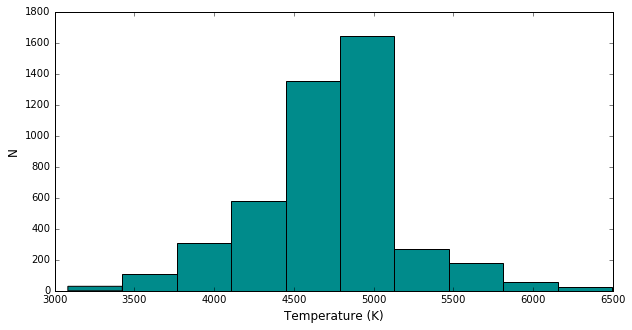

In [10]:
#check out the stellar temperatures (no bad values)
df.teff.hist(color='darkcyan')
grid('off')
plt.xlabel(r'Temperature (K)',fontsize=12)
plt.ylabel(r'N',fontsize=12)

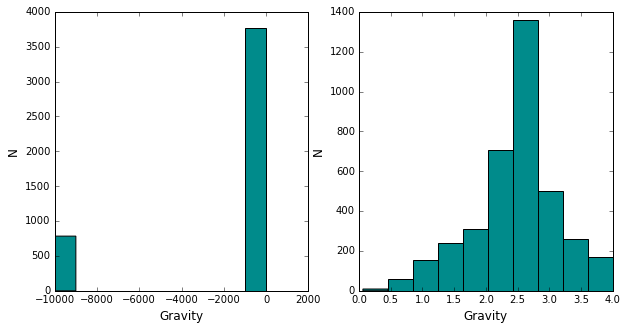

In [11]:
#Look at the gravities -- bad values are listed -9999, let's get rid of those stars
plt.subplot(121)
df.logg.hist(color='darkcyan')#,figsize=(10,5))
grid('off')
plt.xlabel(r'Gravity',fontsize=12)
plt.ylabel(r'N',fontsize=12)
plt.subplot(122)
df=df[df.logg >0]
df[df.logg>0].logg.hist(color='darkcyan')
grid('off')
plt.xlabel(r'Gravity',fontsize=12)
plt.ylabel(r'N',fontsize=12)

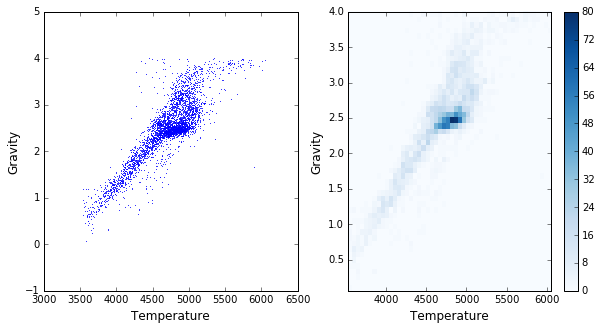

In [23]:
# temperature vs gravity...density plot is also useful here
plt.subplot(121)

plt.scatter(df.teff,df.logg,marker='o',linewidth=0,s=1)
plt.xlabel(r'Temperature',fontsize=12)
plt.ylabel(r'Gravity',fontsize=12)
plt.subplot(122)

plt.hist2d(df.teff,df.logg, (50, 50), cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel(r'Temperature',fontsize=12)
plt.ylabel(r'Gravity',fontsize=12)

In [13]:
#Take the subset of data (chemical abundances and star properties) that we want to analyze
df_params=df[['teff','logg','m_h',
 'alpha_m',
 'c_fe',
 'n_fe',
 'o_fe',
 'na_fe',
 'al_fe',
 'mg_fe',
 'si_fe',
 'p_fe',
 's_fe',
 'k_fe',
 'ca_fe',
 'ti_fe',
 'tiii_fe',
 'v_fe',
 'cr_fe',
 'mn_fe',
 'fe_h',
 'co_fe',
 'ni_fe',
 'cu_fe',
 'ge_fe',
 'rb_fe',
 'j','k']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127a42d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118464210>]], dtype=object)

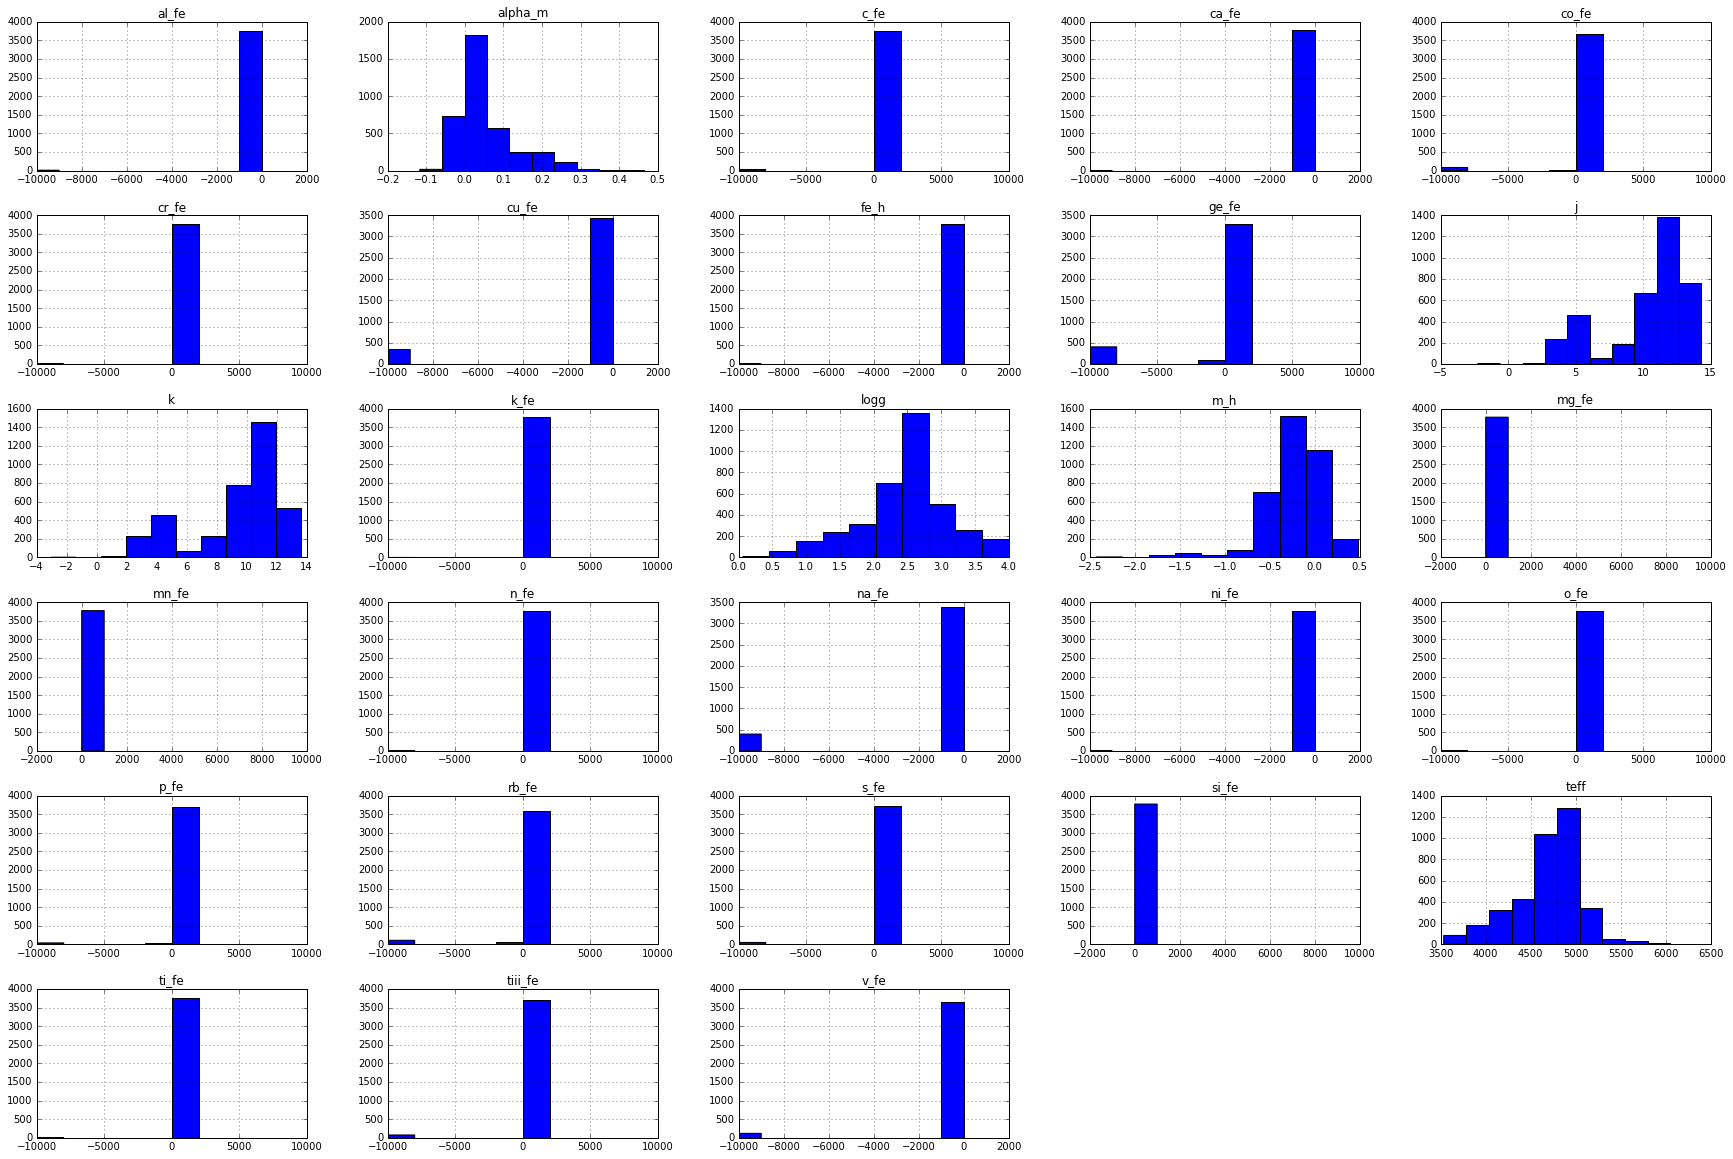

In [14]:
# Check out the chemical abundance distributions: There is an alpha and M value for every star, 
# but the other elements have missing values (represented by -9999)
df_params.hist(figsize=(30,20))

2549

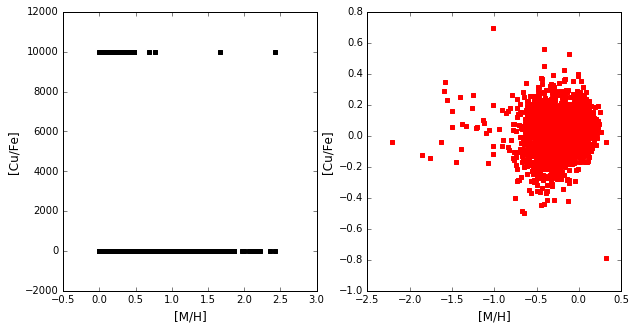

In [15]:
# Some bad values at both -9999 and 9999.  For now eliminate rows where one value is bad
plt.subplot(121)
plt.scatter(np.abs(df_params.m_h),np.abs(df_params.cu_fe),marker='s',color='k')
plt.xlabel(r'[M/H]',fontsize=12)
plt.ylabel(r'[Cu/Fe]',fontsize=12)
df_clip=df_params[(np.abs(df_params) < 8000).all(axis=1)]

plt.subplot(122)
plt.scatter(df_clip.m_h,df_clip.cu_fe,marker='s',color='r')
plt.xlabel(r'[M/H]',fontsize=12)
plt.ylabel(r'[Cu/Fe]',fontsize=12)
len(df_clip.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11859ee50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d0aed50>]], dtype=object)

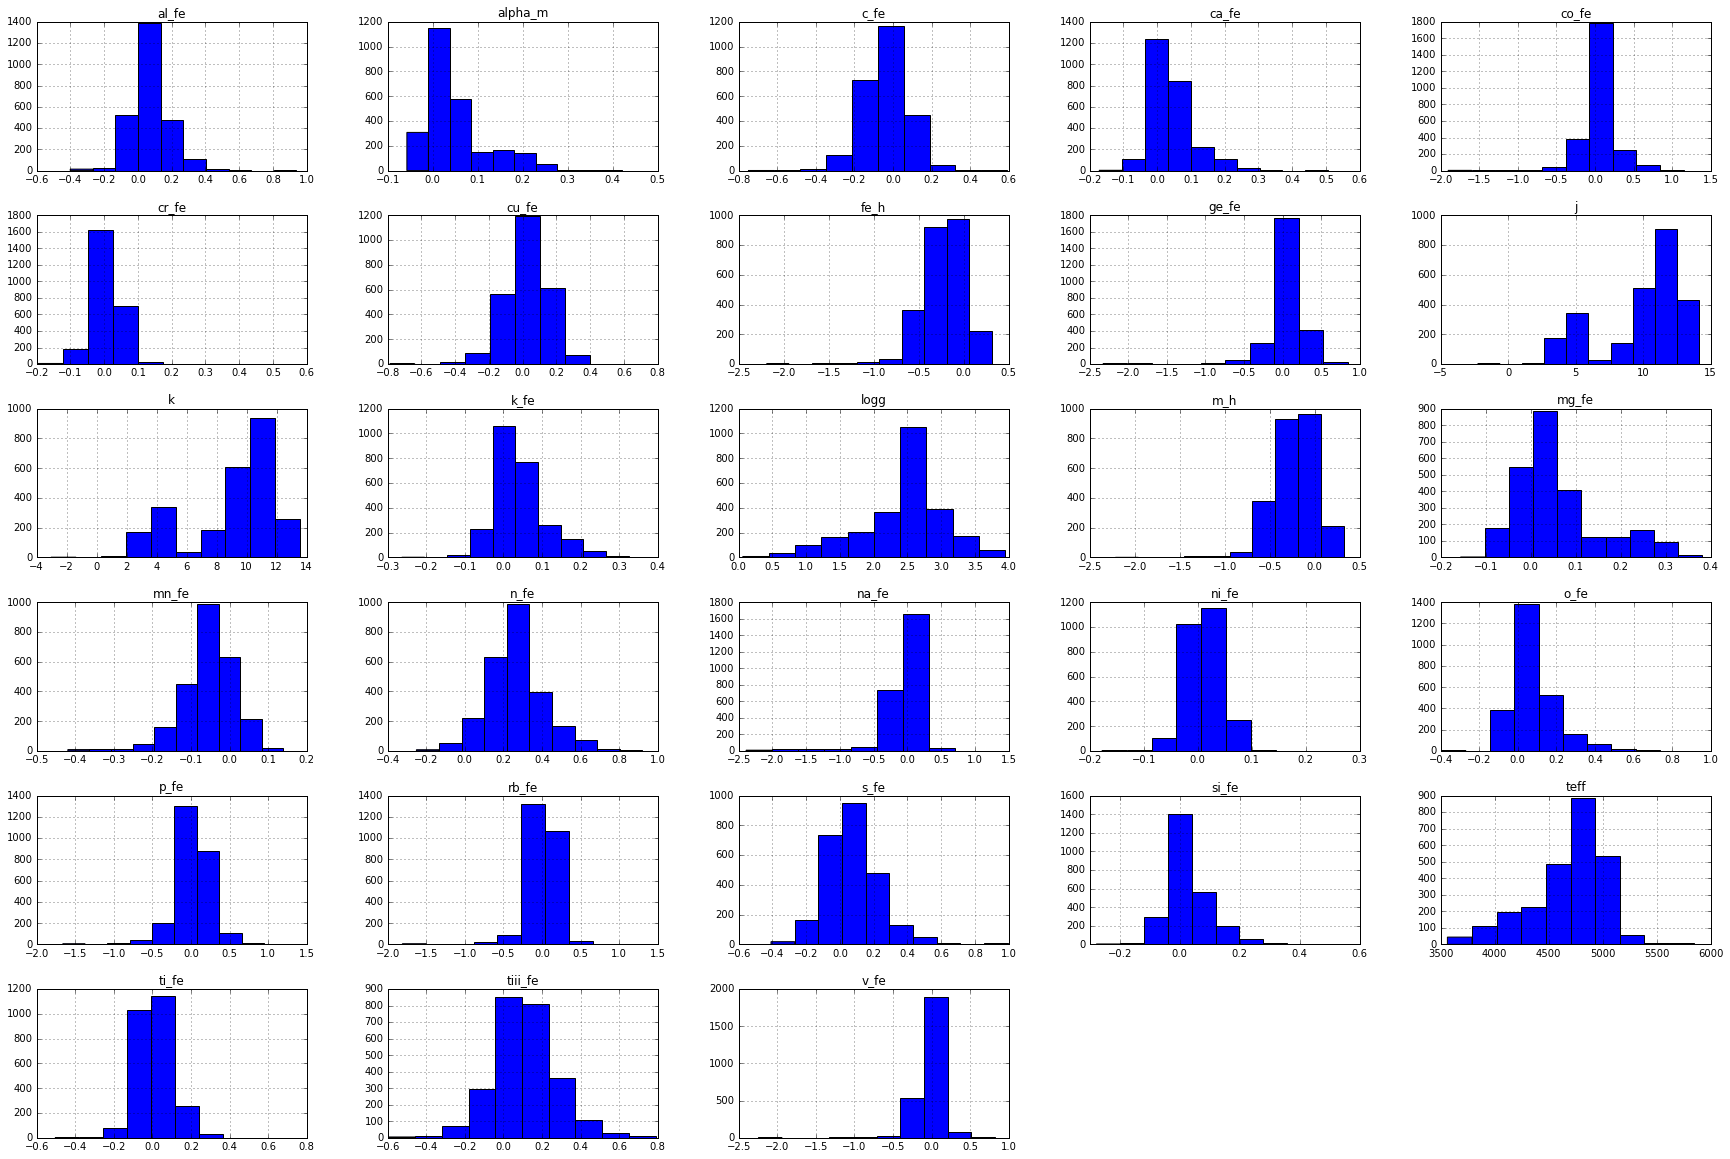

In [16]:
df_clip.hist(figsize=(30,20))

In [17]:
#create a color parameter, clean out extreme values
df_clip['color']=df_clip.j-df_clip.k


/Users/jcolucci/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


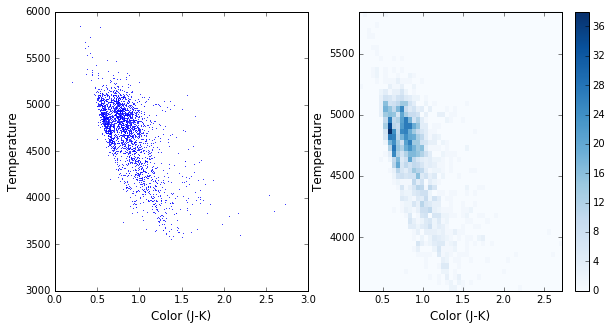

In [22]:
#color temperature plot
plt.subplot(121)

plt.scatter(df_clip.color,df_clip.teff,linewidth=0,s=1)
plt.xlabel(r'Color (J-K)',fontsize=12)
plt.ylabel(r'Temperature',fontsize=12)

plt.subplot(122)

plt.hist2d(df_clip.color,df_clip.teff, (50, 50), cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel(r'Color (J-K)',fontsize=12)
plt.ylabel(r'Temperature',fontsize=12)

In [31]:
#check out a 3d plot of color, metallicity and temperature
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
##ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=120)
#ax.scatter(df_clip.color,df_clip.m_h,df_clip.teff,s=1)
#plt.xlabel(r'Color (J-K)',fontsize=12)
#plt.ylabel(r'[M/H]',fontsize=12)
#plt.zlabel(r'Temperature',fontsize=12)

In [32]:
#feature scale the values for a clustering test
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#X=df.vhelio_avg
X=df_clip
X = MinMaxScaler().fit_transform(X)


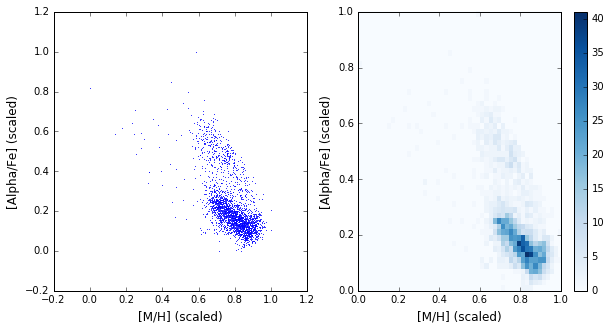

In [35]:
#scaled color and metallicity
#plt.scatter(X[:,2], X[:,3], color='darkorchid',linewidth=0,s=1)
#plt.xlabel(r'[M/H]',fontsize=12)
#plt.ylabel(r'[Alpha/Fe]',fontsize=12)

plt.subplot(121)

plt.scatter(X[:,2], X[:,3],linewidth=0,s=1)
plt.xlabel(r'[M/H] (scaled)',fontsize=12)
plt.ylabel(r'[Alpha/Fe] (scaled)',fontsize=12)
plt.subplot(122)

plt.hist2d(X[:,2], X[:,3], (50, 50), cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel(r'[M/H] (scaled)',fontsize=12)
plt.ylabel(r'[Alpha/Fe] (scaled)',fontsize=12)

In [36]:
#get KMeans, look for halo vs. bulge populations
clf=KMeans(n_clusters=2)

In [37]:
# predict clustering
pred=clf.fit_predict(X)

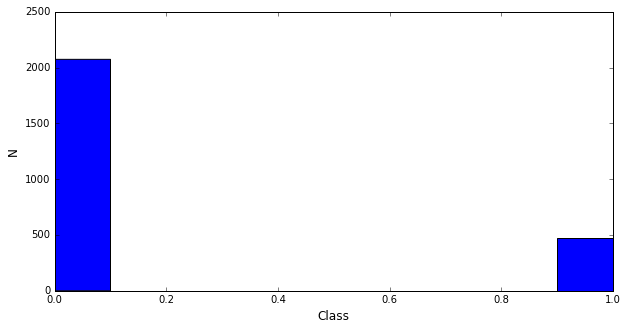

In [38]:
#results?
xx=plt.hist(pred)
plt.xlabel(r'Class',fontsize=12)
plt.ylabel(r'N',fontsize=12)

In [39]:
#add cluster predictions into dataframe
df_clip['pred']=pred
#df_clip

/Users/jcolucci/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


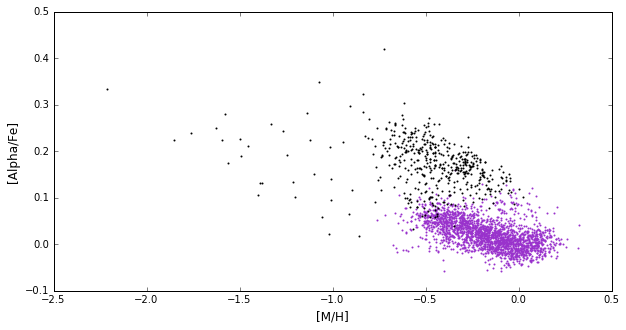

In [41]:
#Show clusters in abundance space
plt.scatter(df_clip[df_clip.pred==0]['m_h'],df_clip[df_clip.pred==0]['alpha_m'],
            color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['m_h'],df_clip[df_clip.pred==1]['alpha_m'],color='k',s=1)
#plt.scatter(df_clip[df_clip.pred==2]['m_h'],df_clip[df_clip.pred==2]['alpha_m'],color='g',s=1)
plt.xlabel(r'[M/H]',fontsize=12)
plt.ylabel(r'[Alpha/Fe]',fontsize=12)

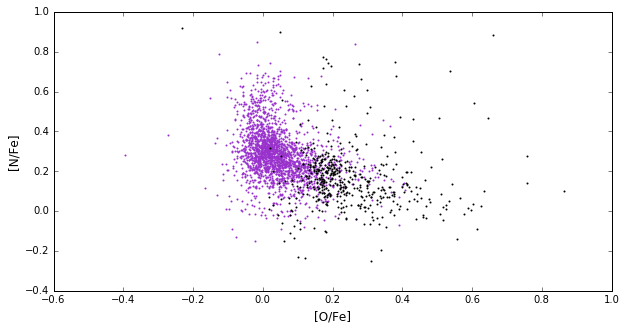

In [49]:
plt.scatter(df_clip[df_clip.pred==0]['o_fe'],df_clip[df_clip.pred==0]['n_fe']
            ,color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['o_fe'],df_clip[df_clip.pred==1]['n_fe'],color='k',s=1)
#plt.scatter(df_clip[df_clip.pred==2]['alpha_m'],df_clip[df_clip.pred==2]['n_fe'],color='g',s=1)
plt.ylabel(r'[N/Fe]',fontsize=12)
plt.xlabel(r'[O/Fe]',fontsize=12)

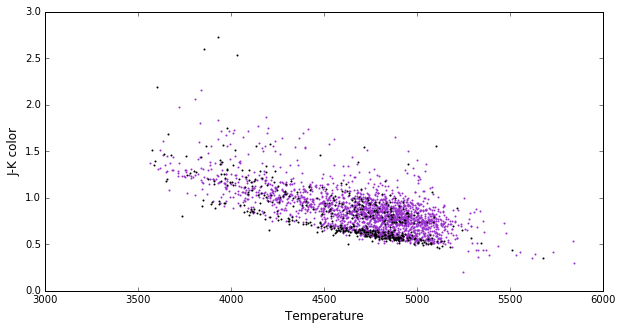

In [57]:
plt.scatter(df_clip[df_clip.pred==0]['teff'],df_clip[df_clip.pred==0]['color']
            ,color='darkorchid',s=1)
plt.scatter(df_clip[df_clip.pred==1]['teff'],df_clip[df_clip.pred==1]['color'],color='k',s=1)
#plt.scatter(df_clip[df_clip.pred==2]['ni_fe'],df_clip[df_clip.pred==2]['n_fe'],color='g',s=1)
plt.ylabel(r'J-K color',fontsize=12)
plt.xlabel(r'Temperature',fontsize=12)

In [ ]:
df_clip.to_csv('apogee.csv', index=False)